In [2]:
#importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#load the data set
data=pd.read_excel('aankalan.xls')
data.head()

Enter a number 0
Enter a number 0


,date,open,high,low,close,volume
0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790
1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927
2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445
3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414
4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875


In [7]:
df=pd.DataFrame(data)
df.head()

,date,open,high,low,close,volume
0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790
1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927
2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445
3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414
4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875


In [9]:
df.shape

(2000, 6)

In [10]:
df.describe

<bound method NDFrame.describe of                      date    open    high     low   close   volume
0     2022-01-03 09:15:00  252.70  254.25  252.35  252.60   319790
1     2022-01-03 09:30:00  252.60  253.65  251.75  252.80   220927
2     2022-01-03 09:45:00  252.95  254.90  252.30  252.85   526445
3     2022-01-03 10:00:00  252.85  253.15  252.40  252.55   280414
4     2022-01-03 10:15:00  252.55  253.10  252.25  252.80   112875
5     2022-01-03 10:30:00  252.80  253.00  252.40  252.55   162146
6     2022-01-03 10:45:00  252.55  252.80  252.45  252.60   125512
7     2022-01-03 11:00:00  252.55  252.85  252.45  252.80   221839
8     2022-01-03 11:15:00  252.65  253.05  252.45  252.45   455098
9     2022-01-03 11:30:00  252.60  252.60  251.50  251.70   210527
10    2022-01-03 11:45:00  251.70  251.70  250.25  250.80   469877
11    2022-01-03 12:00:00  250.80  250.85  250.00  250.75   290976
12    2022-01-03 12:15:00  250.75  250.95  250.05  250.50   568042
13    2022-01-03 12:30:00  2

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 6 columns):
date      2000 non-null object
open      2000 non-null float64
high      2000 non-null float64
low       2000 non-null float64
close     2000 non-null float64
volume    2000 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 109.4+ KB


In [35]:
avg_open=(df.iloc[:,1].sum())/2000
avg_high=(df.iloc[:,2].sum())/2000
avg_low=(df.iloc[:,3].sum())/2000
avg_close=(df.iloc[:,4].sum())/2000

print("Average opening price is: ",avg_open)
print("Average high price is: ",avg_high)
print("Average low price is: ",avg_low)
print("Average closing price is: ",avg_close)

Average opening price is:  304.07205
Average high price is:  305.11275
Average low price is:  303.062375
Average closing price is:  304.0875


In [18]:
#Use open stock price model for fitting the model
training_set=df.iloc[:,1:2].values
training_set

array([[252.7 ],
       [252.6 ],
       [252.95],
       ...,
       [338.  ],
       [338.15],
       [334.7 ]])

In [19]:
#Normalize the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
scaled_training_set

array([[0.03123288],
       [0.03013699],
       [0.0339726 ],
       ...,
       [0.9660274 ],
       [0.96767123],
       [0.92986301]])

In [21]:
X_train=[]
Y_train=[]

for i in range(100,len(df)):
    X_train.append(scaled_training_set[i-100:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
Y_train=np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)

(1900, 100)
(1900,)


In [22]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1900, 100, 1)

In [31]:
#Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [32]:
regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [33]:
#Fitting the model
regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
60/60 [==============================] - 14s 233ms/step - loss: 0.0396
Epoch 2/100
60/60 [==============================] - 10s 175ms/step - loss: 0.0078
Epoch 3/100
60/60 [==============================] - 12s 204ms/step - loss: 0.0071
Epoch 4/100
60/60 [==============================] - 12s 203ms/step - loss: 0.0074
Epoch 5/100
60/60 [==============================] - 13s 215ms/step - loss: 0.0073
Epoch 6/100
60/60 [==============================] - 11s 183ms/step - loss: 0.0062
Epoch 7/100
60/60 [==============================] - 11s 179ms/step - loss: 0.0063
Epoch 8/100
60/60 [==============================] - 10s 172ms/step - loss: 0.0060
Epoch 9/100
60/60 [==============================] - 14s 232ms/step - loss: 0.0056
Epoch 10/100
60/60 [==============================] - 14s 239ms/step - loss: 0.0059
Epoch 11/100
60/60 [==============================] - 15s 242ms/step - loss: 0.0052
Epoch 12/100
60/60 [==============================] - 17s 276ms/step - loss: 0.0052
E

In [37]:
dataset_test=pd.read_excel("aankalan_test.xls")
df_test=pd.DataFrame(dataset_test)
actual_stock_price=df_test.iloc[:,1:2].values

In [41]:
dataset_total=pd.concat((df['open'],df_test['open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(df_test)-100:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test=[]
for i in range(100,300):
    X_test.append(inputs[i-100:i,0])
    
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [42]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

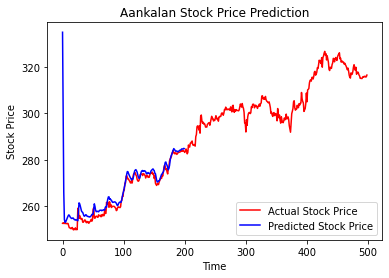

In [44]:
plt.plot(actual_stock_price,color="red",label="Actual Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Stock Price")
plt.title('Aankalan Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()